<a href="https://colab.research.google.com/github/adkBMW/TelecomX_Churn_Analysis/blob/main/TelecomX_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Cargar los datos desde la API y convertirlos en DataFrame

In [3]:
# 1. Importar librerias necesarias
import pandas as pd
import requests

# 2. Definir la URL del archivo JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# 3. Cargar los datos desde la API
response = requests.get(url)
data = response.json()  # Convertir el JSON a un objeto de Python

# 4. Transformar los datos en un DataFrame de Pandas
df = pd.DataFrame(data)

# 5. Verificar la carga
print("Primeras filas del DataFrame:")
display(df.head())       # Mostrar las primeras filas
print("\nInformacion general del DataFrame:")
df.info()                # Revisar columnas y tipos de datos


Primeras filas del DataFrame:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



Informacion general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('customerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Churn'].value_counts()
    for x_label, grp in _df_2.groupby('customerID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customerID')
_ = plt.ylabel('Churn')

Paso 2: Comprobacion de incoherencias en los datos

In [5]:
from pandas import json_normalize

# 1. Identificar columnas que contienen diccionarios
columnas_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas con diccionarios:", columnas_dict)

# 2. Normalizar columnas con diccionarios
for col in columnas_dict:
    print(f"\nNormalizando columna: {col}")
    df_normalized = json_normalize(df[col])
    df_normalized.columns = [f"{col}_{subcol}" for subcol in df_normalized.columns]  # renombrar columnas
    df = df.drop(col, axis=1).join(df_normalized)

# 3. Revisar valores ausentes por columna
print("\nValores ausentes por columna:")
print(df.isnull().sum())

# 4. Comprobar filas duplicadas
duplicados = df.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")

# 5. Revisar tipos de datos de cada columna
print("\nTipos de datos de las columnas:")
print(df.dtypes)

# 6. Verificar valores unicos en columnas categoricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
print("\nValores unicos por columna categorica:")
for col in columnas_categoricas:
    print(f"{col}: {df[col].unique()}")

# 7. Normalizar columnas de fecha si existen
columnas_fecha = df.select_dtypes(include=['datetime64[ns]']).columns
for col in columnas_fecha:
    df[col] = df[col].dt.normalize()
    print(f"\nPrimeras 5 fechas normalizadas en columna {col}:")
    print(df[col].head())


Columnas con diccionarios: ['customer', 'phone', 'internet', 'account']

Normalizando columna: customer

Normalizando columna: phone

Normalizando columna: internet

Normalizando columna: account

Valores ausentes por columna:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

Cantidad de filas duplicadas: 0

Tipos de datos de las columnas:
customerID                    object
Churn 

Paso 3: Manejo de inconsistencias

In [7]:
# Paso 3: Manejo de inconsistencias y clasificacion de pagos

from pandas import json_normalize

# --- Normalizar columnas con diccionarios si no se hizo antes ---
columnas_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
for col in columnas_dict:
    df_normalized = json_normalize(df[col])
    df_normalized.columns = [f"{col}_{subcol}" for subcol in df_normalized.columns]
    df = df.drop(col, axis=1).join(df_normalized)

# --- Corregir valores vacios en Churn ---
df['Churn'] = df['Churn'].replace('', 'no')

# --- Convertir account_Charges.Total a numerico ---
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# --- Estandarizar columnas categoricas ---
columnas_categoricas = df.select_dtypes(include=['object']).columns
for col in columnas_categoricas:
    df[col] = df[col].str.lower()

# --- Clasificacion de pagos: mensual vs pago unico ---
df['calculo_total'] = df['account_Charges.Monthly'] * df['customer_tenure']
df['tipo_pago'] = ['mensual' if abs(total - calc) < 1 else 'pago_unico'
                    for total, calc in zip(df['account_Charges.Total'], df['calculo_total'])]

# --- Verificar cambios ---
print("Valores unicos en Churn:", df['Churn'].unique())
print("\nValores unicos en tipo_pago:", df['tipo_pago'].unique())
print("\nTipos de datos despues de las correcciones:")
print(df.dtypes)
print("\nValores ausentes por columna despues de la correccion:")
print(df.isnull().sum())

# --- Eliminar columna temporal calculo_total ---
df = df.drop('calculo_total', axis=1)


Valores unicos en Churn: ['no' 'yes']

Valores unicos en tipo_pago: ['pago_unico' 'mensual']

Tipos de datos despues de las correcciones:
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
calculo_total                float64
tipo_pago                     object
dtype: obje

Paso 4: Creacion de columna Cuentas_Diarias usando 30 dias por mes

In [11]:
# Calculo Cuentas_Diarias
df['Cuentas_Diarias'] = df['account_Charges.Monthly'] / 30

# Verificar los primeros registros
print(df[['customerID', 'account_Charges.Monthly', 'Cuentas_Diarias']].head())

# Estadisticas basicas de Cuentas_Diarias
print("\nEstadisticas de Cuentas_Diarias:")
print(df['Cuentas_Diarias'].describe())

   customerID  account_Charges.Monthly  Cuentas_Diarias
0  0002-orfbo                     65.6         2.186667
1  0003-mknfe                     59.9         1.996667
2  0004-tlhlj                     73.9         2.463333
3  0011-igkff                     98.0         3.266667
4  0013-exchz                     83.9         2.796667

Estadisticas de Cuentas_Diarias:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


Paso 5: Estandarizacion y transformacion de datos

In [12]:
# Convertir columnas binarias de texto a numerico
columnas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents',
                     'phone_PhoneService', 'phone_MultipleLines',
                     'internet_OnlineSecurity', 'internet_OnlineBackup',
                     'internet_DeviceProtection', 'internet_TechSupport',
                     'internet_StreamingTV', 'internet_StreamingMovies',
                     'account_PaperlessBilling']

for col in columnas_binarias:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'no phone service': 0, 'no internet service': 0})

# Renombrar columnas para mayor claridad
df.rename(columns={
    'customer_gender': 'Genero_Cliente',
    'customer_SeniorCitizen': 'Mayor_65',
    'customer_tenure': 'Meses_Cliente',
    'phone_PhoneService': 'Servicio_Telefono',
    'internet_InternetService': 'Tipo_Internet',
    'account_Contract': 'Tipo_Contrato',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges.Monthly': 'Cobro_Mensual',
    'account_Charges.Total': 'Cobro_Total'
}, inplace=True)

# Verificar cambios
print(df.head())
print("\nTipos de datos despues de estandarizacion:")
print(df.dtypes)


   customerID  Churn Genero_Cliente  Mayor_65  customer_Partner  \
0  0002-orfbo      0         female         0                 1   
1  0003-mknfe      0           male         0                 0   
2  0004-tlhlj      1           male         0                 0   
3  0011-igkff      1           male         1                 1   
4  0013-exchz      1         female         1                 1   

   customer_Dependents  Meses_Cliente  Servicio_Telefono  phone_MultipleLines  \
0                    1              9                  1                    0   
1                    0              9                  1                    1   
2                    0              4                  1                    0   
3                    0             13                  1                    0   
4                    0              3                  1                    0   

  Tipo_Internet  ...  internet_TechSupport  internet_StreamingTV  \
0           dsl  ...                     1

Paso 6: Analisis Descriptivo

In [14]:
# Seleccionamos columnas numericas
columnas_numericas = df.select_dtypes(include='number')

# Descripcion estadistica basica
descripcion = columnas_numericas.describe()
print("Resumen estadistico de columnas numericas:")
print(descripcion)

# Calculo de la mediana
medianas = columnas_numericas.median()
print("\nMedianas de las columnas numericas:")
print(medianas)

# Desviacion estandar
desviaciones = columnas_numericas.std()
print("\nDesviaciones estandar de las columnas numericas:")
print(desviaciones)

Resumen estadistico de columnas numericas:
             Churn     Mayor_65  customer_Partner  customer_Dependents  \
count  7267.000000  7267.000000       7267.000000          7267.000000   
mean      0.257190     0.162653          0.484106             0.300124   
std       0.437115     0.369074          0.499782             0.458343   
min       0.000000     0.000000          0.000000             0.000000   
25%       0.000000     0.000000          0.000000             0.000000   
50%       0.000000     0.000000          0.000000             0.000000   
75%       1.000000     0.000000          1.000000             1.000000   
max       1.000000     1.000000          1.000000             1.000000   

       Meses_Cliente  Servicio_Telefono  phone_MultipleLines  \
count    7267.000000        7267.000000          7267.000000   
mean       32.346498           0.902711             0.421770   
std        24.571773           0.296371             0.493876   
min         0.000000           0.0

Paso 7: Distribucion de evasión

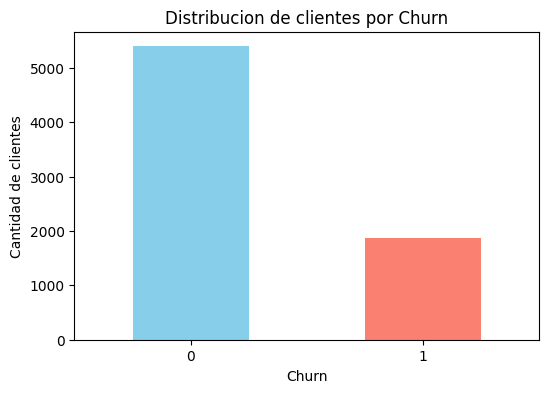

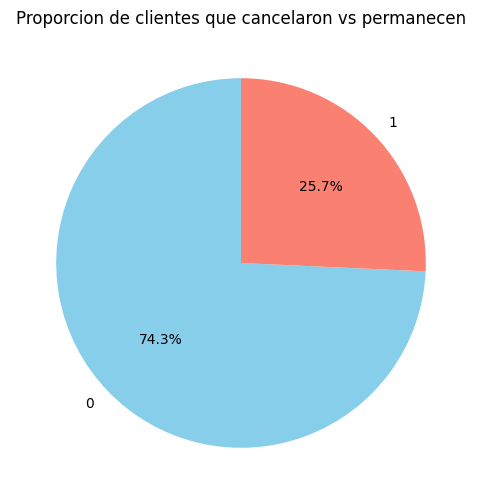

In [15]:
import matplotlib.pyplot as plt

# Contar la cantidad de clientes por estado de churn
churn_counts = df['Churn'].value_counts()

# Graficar la distribucion en un grafico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Distribucion de clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# Grafico de torta (opcional)
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.ylabel('')
plt.title('Proporcion de clientes que cancelaron vs permanecen')
plt.show()

Paso 8: Recuento de evasión por variables categoricas

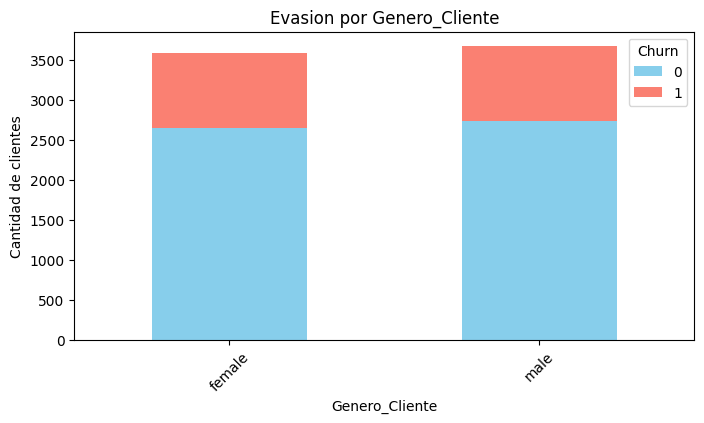

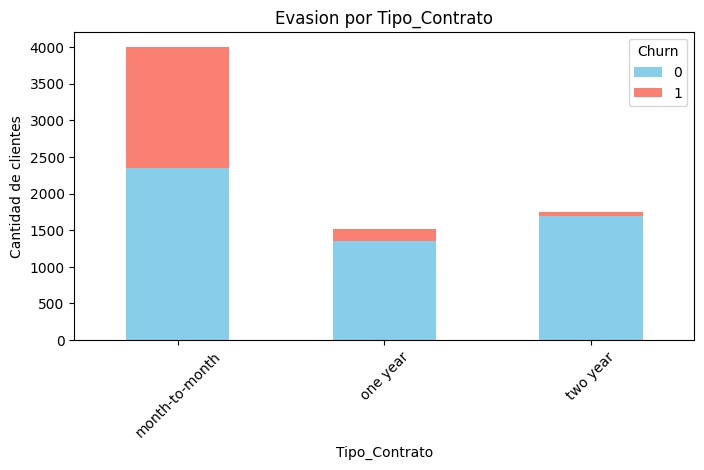

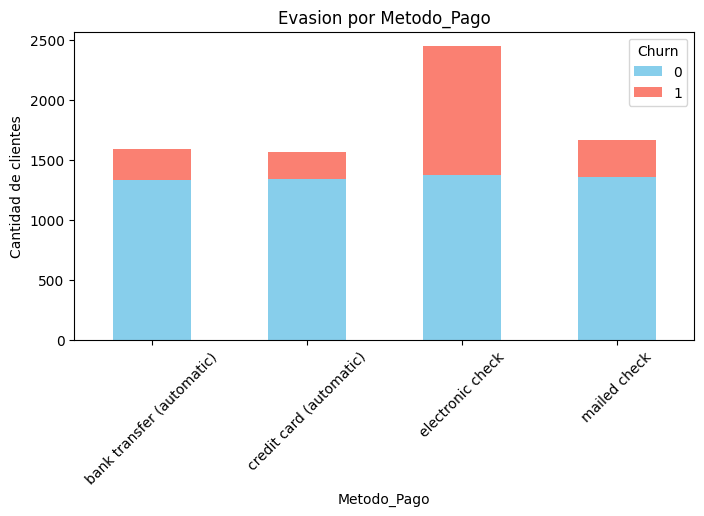

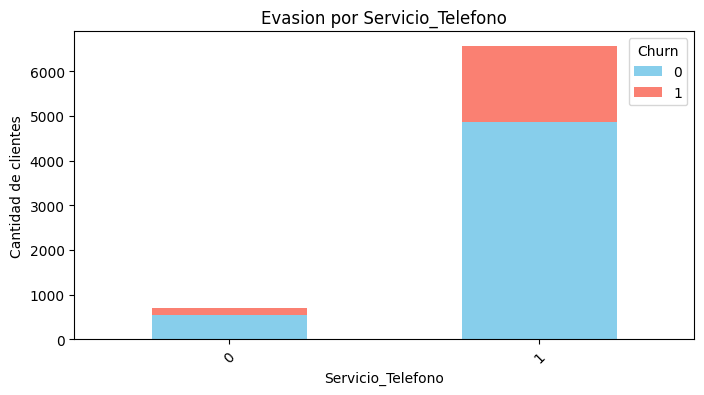

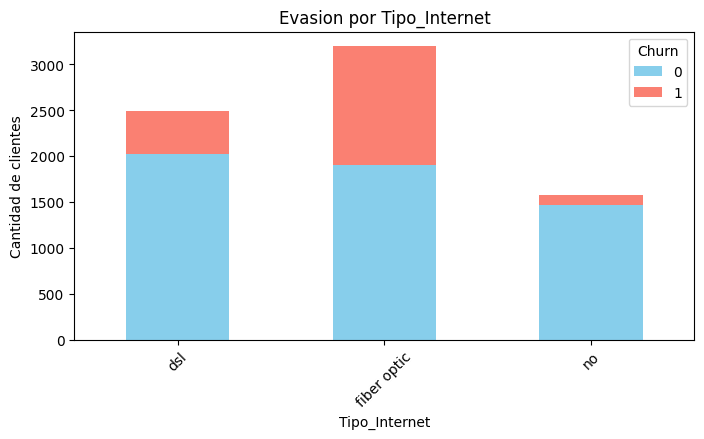

In [16]:
import matplotlib.pyplot as plt

# Lista de variables categoricas a analizar
categoricas = ['Genero_Cliente', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Telefono', 'Tipo_Internet']

# Iteramos por cada variable y graficamos
for col in categoricas:
    conteo = df.groupby([col, 'Churn']).size().unstack()

    # Grafico de barras apiladas
    conteo.plot(kind='bar', stacked=True, figsize=(8,4), color=['skyblue','salmon'])
    plt.title(f'Evasion por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.show()

Paso 9: Conteo de evasión por variables numericas

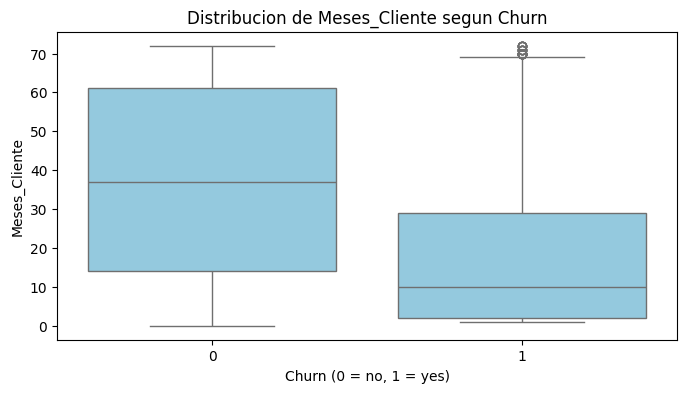

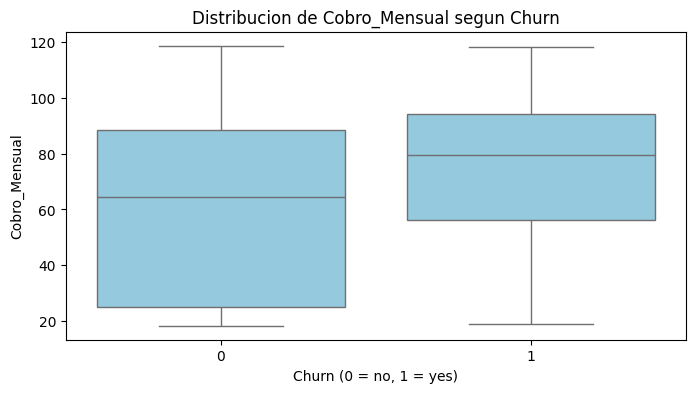

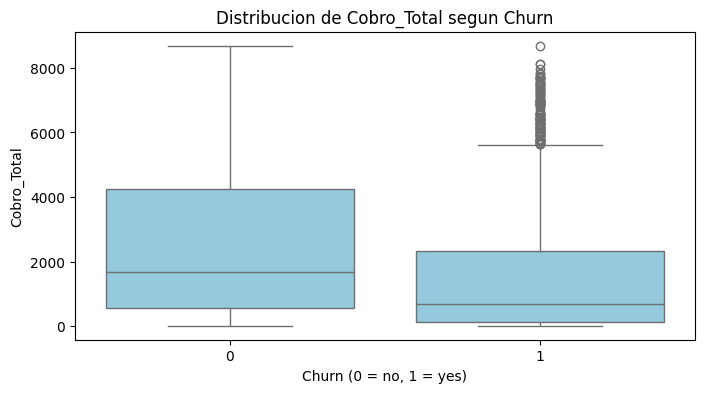

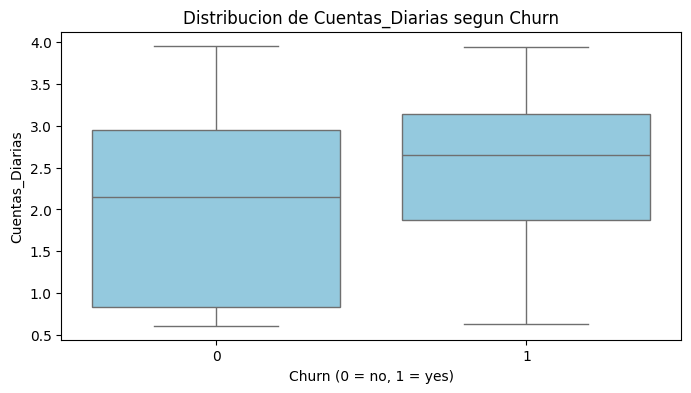

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos Churn a entero (si aún no lo es)
df['Churn'] = df['Churn'].astype(int)

numericas = ['Meses_Cliente', 'Cobro_Mensual', 'Cobro_Total', 'Cuentas_Diarias']

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(
        x='Churn',
        y=col,
        data=df,
        color='skyblue'  # un solo color para todos los grupos
    )
    plt.title(f'Distribucion de {col} segun Churn')
    plt.xlabel('Churn (0 = no, 1 = yes)')
    plt.ylabel(col)
    plt.show()